<a href="https://colab.research.google.com/github/labudzki/BasicModelsofBiologicalNetworks/blob/main/BZ_PySCeS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pysces

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.3 MB/s eta 0:00:00


In [2]:
import pysces

Cannot load backend 'TkAgg' which requires the 'tk' interactive framework, as 'headless' is currently running

PySCeS defaults to matplotlib's TKagg backend if not specified                          in the user configuration file, set "matplotlib_backend = <backend>" 
Matplotlib interface loaded (pysces.plt.m)
Pitcon routines available
NLEQ2 routines available
INFO: libSBML not installed, SBML support not available.
You are using NumPy (1.26.4) with SciPy (1.13.1)
RateChar is available
INFO: Parallel scanner not available

PySCeS environment
******************
pysces.model_dir = /root/Pysces/psc
pysces.output_dir = /root/Pysces


***********************************************************************
* Welcome to PySCeS (1.2.2) - Python Simulator for Cellular Systems   *
*                http://pysces.sourceforge.net                        *
* Copyright(C) B.G. Olivier, J.M. Rohwer, J.-H.S. Hofmeyr, 2004-2024  *
* Triple-J Group for Molecular Cell Physiology                        *
* 


$$
BrO_3^- + Br^-  \xrightarrow{1}  HBrO_2 + HOBr\\
HBrO_2 + Br^-  \xrightarrow{2}  2HOBr
$$


$$
BrO_3^- + HBrO_2 \xrightarrow{3} 2HBrO_2 + 2Ce^{4+} \\
2HBrO_2 \xrightarrow{4} BrO_3^- + HOBr \\
CH_2(COOH)_2 + Ce^{4+} \xrightarrow{5} \frac{1}{2} fBr^-
$$


In [3]:
model_description = '''

# fix concentrations
FIX: bro3 ch2cooh2 hobr

#reactions
r1:
bro3 + br > hbro2 + hobr
bro3 * br * k1

r2:
hbro2 + br > {2}hobr
hbro2 * br * k2

r3:
bro3 + hbro2 > {2}hbro2 + {2}ce
bro3 * hbro2 * k3

r4:
{2}hbro2 > bro3 + hobr
(hbro2**2) * k4

r5:
ch2cooh2 + ce >  {0.5}br
ch2cooh2 * ce * k5

#parameters
k1 = 5.64
k2 = 3e6
k3 = 80
k4 = 5e3
k5 = 1.6

#initital values
bro3 = 1
br = 1
hbro2 = 1
hobr = 1
ce = 1
ch2cooh2 = 1

'''

In [4]:
model = pysces.model('my_model', loader='string', fString=model_description)

Assuming extension is .psc
Using model directory: /root/Pysces/psc
Using file: my_model.psc
/root/Pysces/psc/orca/my_model.psc loading ..... 
Parsing file: /root/Pysces/psc/orca/my_model.psc
Info: "hobr" has been initialised but does not occur in a rate equation
 
Calculating L matrix . . . . . . .  done.
Calculating K matrix . . . . . . .  done.
 


In [5]:
model.doSim(end=20, points = 1000)

LSODA time for 1000 points: 0.581127405166626


/usr/local/lib/python3.11/dist-packages/pysces/PyscesModel.py:4058: ODEintWarning: Integration successful.
  sim_res, infodict = scipy.integrate.odeint(


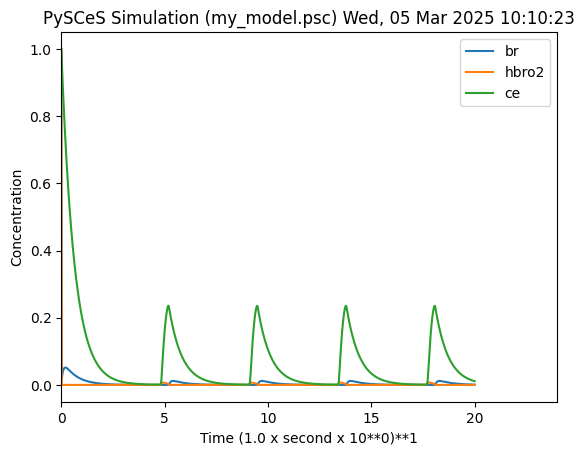

In [6]:
model.SimPlot()